## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2020-21 учебный год

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
# your code here
data = pd.read_csv("https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv")
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [3]:
# Количественные - duration, amount, age
# Бинарные - telephone, foreign_worker, credit_risk, people_liable
# Порядковые - status, credit_history, savings, employment_duration, installment_rate, 
# other_debtors, present_residence, housing, number_credits, job, property, other_installment_plans
# Категориальные - purpose, personal_status_sex

binary = ['telephone', 'foreign_worker', 'credit_risk', 'people_liable']
order = ['status', 'credit_history', 'savings', 'employment_duration', 'installment_rate', 
         'other_debtors', 'present_residence', 'housing', 'number_credits', 'job', 'property', 
         'other_installment_plans']
data.isnull().values.sum() > 0

False

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [4]:
data.groupby("purpose")["amount"].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [5]:
(data[(data["age"] < 30)]["housing"] == "rent").mean() * 100

66.66666666666666

In [6]:
(data[(data["age"] > 40)]["housing"] == "rent").mean() * 100

68.01470588235294

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [7]:
print(data["number_credits"].unique())
data[(data["foreign_worker"] == "yes") & ((data["number_credits"] == "4-5") | (data["number_credits"] == ">= 6"))].shape[0]

['1' '2-3' '4-5' '>= 6']


1

### Задание 6 (1 балл)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

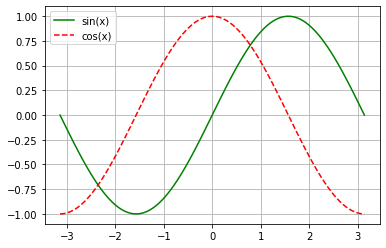

In [9]:
x = np.linspace(-np.pi, np.pi, 100)
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), '--r', label='cos(x)')
plt.grid()

plt.legend();

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

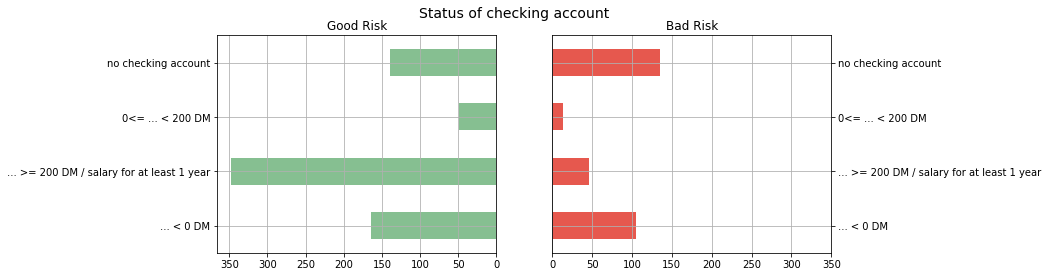

In [10]:
goods = data[(data["credit_risk"] == "good")].groupby("status").agg("size")
bads = data[(data["credit_risk"] == "bad")].groupby("status").agg("size")

f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
f.suptitle('Status of checking account', fontsize=14)
ax1.set_title('Good Risk')
ax2.set_title('Bad Risk')

ax1.yaxis.label.set_visible(False)
ax2.yaxis.label.set_visible(False)
f.set_figwidth(11)

ax1.invert_yaxis()
ax1.invert_xaxis()
ax2.yaxis.tick_right()


goods.plot(kind='barh', color='#86bf91', ax = ax1)
bads.plot(kind='barh', color='#e6584e', ax = ax2)
plt.xlim([0, 350])

ax1.grid(b=None)
ax2.grid(b=None)

plt.show()

### Задание 8  (0.5 балла)

In [11]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11,5)}, style="whitegrid")

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

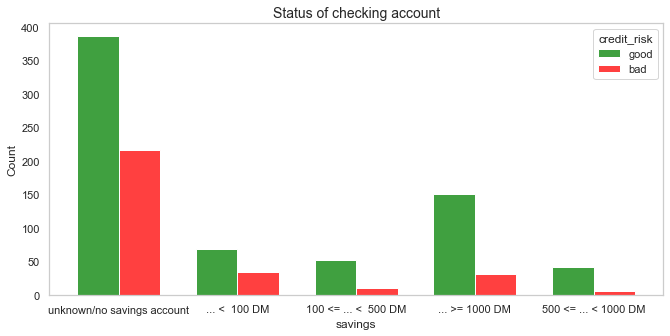

In [12]:
sns.histplot(data=data,x="savings",hue="credit_risk", multiple="dodge", palette=["green", "red"], shrink = .7)
plt.title('Status of checking account', fontsize=14)
plt.grid(b=None)
plt.show()

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

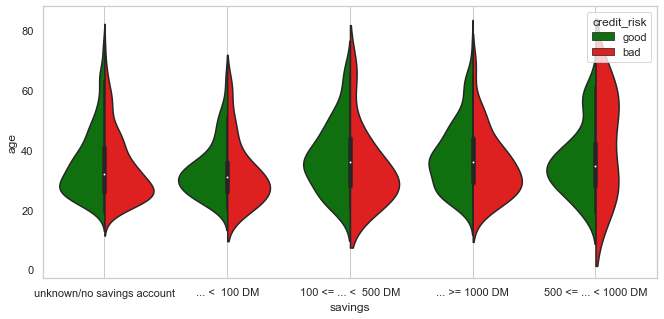

In [13]:
f, ax = plt.subplots()
ax = sns.violinplot(x="savings", y="age", hue="credit_risk", data=data, palette=["green", "red"], split = True)
plt.grid(b=None)

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

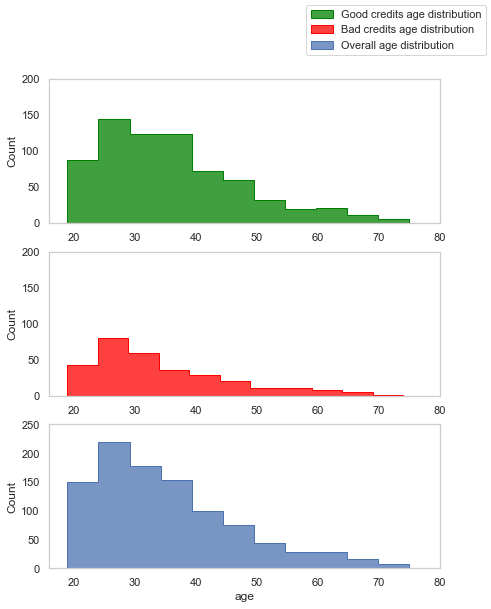

In [14]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharey=False)
a = (data[(data["credit_risk"] == "good")])
b = (data[(data["credit_risk"] == "bad")])
f.set_figwidth(7)
f.set_figheight(9)


ax1.set_xlim(16, 80)
ax1.set_ylim(0, 200)
ax2.set_xlim(16, 80)
ax2.set_ylim(0, 200)
ax3.set_xlim(16, 80)
ax3.set_ylim(0, 250)

sns.histplot(ax=ax1, data=a, x="age", bins=11, color="green", element="step", label="Good credits age distribution")
sns.histplot(ax=ax2, data=b, x="age", bins=11, element="step", color="red", label="Bad credits age distribution")
sns.histplot(ax=ax3, data=data, x="age", bins=11, element="step", label="Overall age distribution")
ax1.xaxis.label.set_visible(False)
ax2.xaxis.label.set_visible(False)

ax1.grid(b=None)
ax2.grid(b=None)
ax3.grid(b=None)

f.legend(loc="upper right")
plt.show()

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

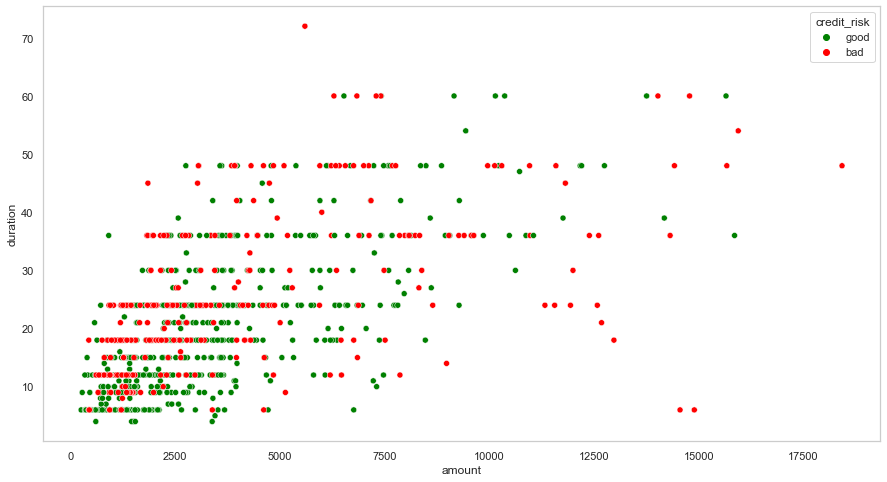

In [15]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
sns.scatterplot(data=data, x="amount", y="duration", hue="credit_risk", palette=["green", "red"])
plt.grid(b=None)

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

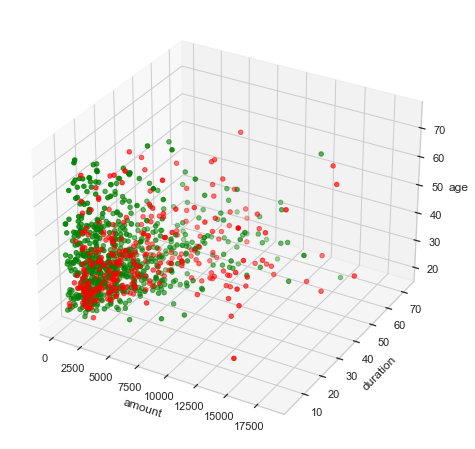

In [16]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection = '3d')

df = data[data["credit_risk"] == "good"]
df1 = data[data["credit_risk"] == "bad"]

x = df["amount"]
y = df['duration']
z = df['age']

x1 = df1["amount"]
y1 = df1['duration']
z1 = df1['age']

ax.set_xlabel("amount")
ax.set_ylabel("duration")
ax.set_zlabel("age")

ax.scatter(x, y, z, color="green")
ax.scatter(x1, y1, z1, color="red")

plt.show()

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [17]:
data = data.drop(['purpose', 'personal_status_sex'], axis=1)
data.head()

,status,duration,credit_history,amount,savings,employment_duration,installment_rate,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,1049,unknown/no savings account,< 1 yr,< 20,none,>= 7 yrs,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,none,1 <= ... < 4 yrs,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,none,>= 7 yrs,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,none,1 <= ... < 4 yrs,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,none,>= 7 yrs,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i in binary:
    data[i] = encoder.fit_transform(data[i])
for i in order:
    data[i] = encoder.fit_transform(data[i])
data.head()

,status,duration,credit_history,amount,savings,employment_duration,installment_rate,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,3,18,0,1049,4,2,2,2,3,1,21,1,0,0,1,0,0,0,1
1,3,9,0,2799,4,0,1,2,0,3,36,1,0,1,1,1,0,0,1
2,0,12,4,841,0,1,1,2,3,3,23,1,0,0,3,0,0,0,1
3,3,12,0,2122,4,0,0,2,0,3,39,1,0,1,3,1,0,1,1
4,3,12,0,2171,4,0,2,2,3,1,38,0,2,1,3,0,0,1,1


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def groupAge(x):
    if x < 20:
        return 0
    if 20 <= x < 30:
        return 1
    if 30 <= x < 40:
        return 2
    if 40 <= x < 50:
        return 3
    if 50 <= x < 60:
        return 4
    return 5

def groupAmount(x):
    if x < 2500:
        return 0
    if 2500 <= x < 5000:
        return 1
    if 5000 <= x < 7500:
        return 2
    if 7500 <= x < 12500:
        return 3
    return 4

def groupDuration(x):
    if x < 10:
        return 0
    if 10 <= x < 20:
        return 1
    if 20 <= x < 30:
        return 2
    if 30 <= x < 50:
        return 3
    return 4

data["age"] = data["age"].apply(lambda x: groupAge(x))
data["amount"] = data["amount"].apply(lambda x: groupAmount(x))
data["duration"] = data["duration"].apply(lambda x: groupDuration(x))
data.head()

,status,duration,credit_history,amount,savings,employment_duration,installment_rate,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,3,1,0,0,4,2,2,2,3,1,1,1,0,0,1,0,0,0,1
1,3,0,0,1,4,0,1,2,0,3,2,1,0,1,1,1,0,0,1
2,0,1,4,0,0,1,1,2,3,3,1,1,0,0,3,0,0,0,1
3,3,1,0,0,4,0,0,2,0,3,2,1,0,1,3,1,0,1,1
4,3,1,0,0,4,0,2,2,3,1,2,0,2,1,3,0,0,1,1


In [20]:
data = data.drop(['other_installment_plans', 'employment_duration', 'foreign_worker', 'installment_rate'], axis=1)

def dist(x, z):
    d = 0
    for i in range(0, len(x)):
        d += (x[i] - z[i])**2
    return np.sqrt(d)

def predict(X_train: np.array, y_train: np.array, Xtest: np.array) -> np.array:
    ans = []
    b = np.zeros((len(y_train),1))
    for i in range(0, len(y_train)):
        b[i] = y_train[i]
    X_train = np.append(X_train, b, axis=1)
    for obj in X_test:
        X_train = sorted(X_train, key=lambda x: dist(obj, x))
        good_count = 0
        bad_count = 0
        for i in range(0, 8):
            if X_train[i][-1] == 1:
                good_count += 1
            else:
                bad_count += 1
        if good_count > bad_count:
            ans.append(1)
        else:
            ans.append(0)
    return ans

X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
accuracy_score(y_test, predict(X_train, y_train, X_test))

0.68